#                                                 CUSTOMER SHOPPING RETAIL SALES DATA (EDA PROJECT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv(r'c:\Users\acer\Downloads\Customer Shopping Dataset - Retail Sales Data.csv')
data.head() 

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [3]:
data.shape

(99457, 10)

## Checking Null Values

In [4]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
data.drop(['customer_id', 'invoice_no'], axis=1, inplace=True)
data

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


In [11]:
for i in data:
    # print(i)
    j=i.replace(' ','_')
    # print(j)
    data=data.rename(columns={i:j.capitalize()})

Gender
Age
Category
Quantity
Price
Payment_method
Invoice_date
Shopping_mall


## Plotting

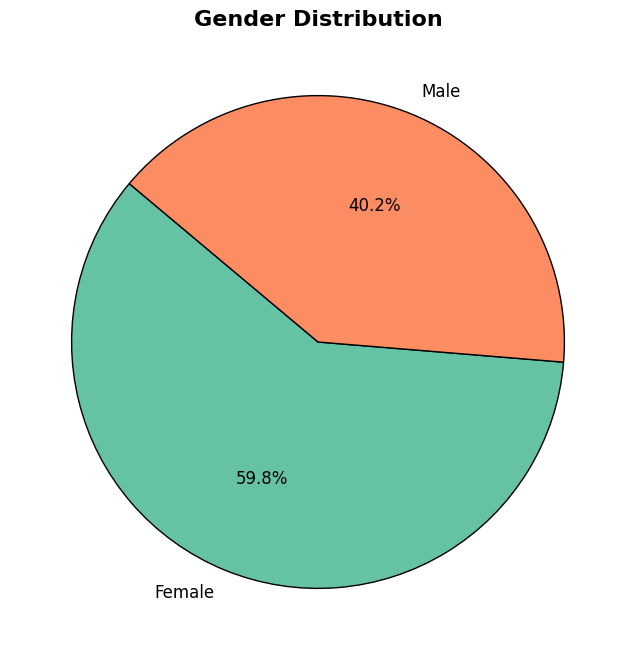

In [13]:
datadata = pd.DataFrame(data)
gender_counts = data['Gender'].value_counts()
colors = sns.color_palette('Set2', n_colors=len(gender_counts))

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12, 'color': 'black'})

plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.show()

 Female customers: 59.8% of the customers are female. This is the majority gender in the dataset.
Male customers: 40.2% of the customers are male. 

## Total Price Spend by Age Group

C:\Users\acer\AppData\Local\Temp\ipykernel_9444\3964990675.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_price_summary = df.groupby('Age_group')['Price'].sum().reset_index()


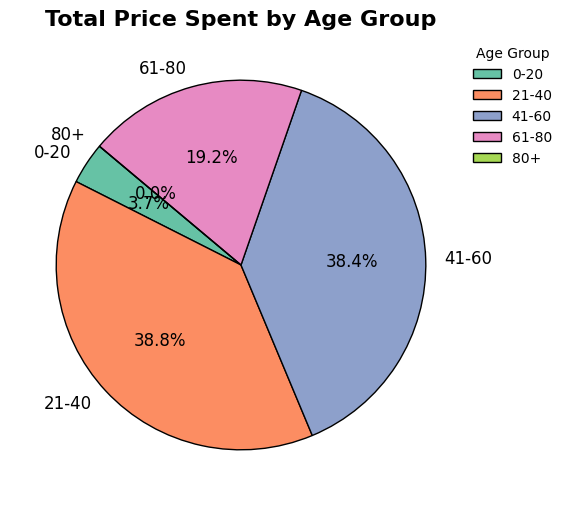

In [14]:
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 80, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_price_summary = df.groupby('Age_group')['Price'].sum().reset_index()


colors = sns.color_palette('Set2', n_colors=len(age_price_summary))
plt.figure(figsize=(10, 6))
plt.pie(
    age_price_summary['Price'], 
    labels=age_price_summary['Age_group'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Total Price Spent by Age Group', fontsize=16, fontweight='bold')
plt.legend(
    title='Age Group',
    labels=age_price_summary['Age_group'],
    loc='upper right',
    bbox_to_anchor=(1.2, 1),
    frameon=False
)
plt.show()

#####
 Age group 21-40: This age group has the highest total spending, accounting for 38.8% of the total amount spent.
#####
 Age group 41-60: This age group also has a significant share of total spending, accounting for 38.4%.
#####
 Age group 61-80: This age group has the third-highest total spending, accounting for 19.2% of the total.
#####
 Age groups 0-20 and 80+: These age groups have relatively low total spending, accounting for 3.7% and 0.8% respectively.

## Number of Purchases by Gender and Category

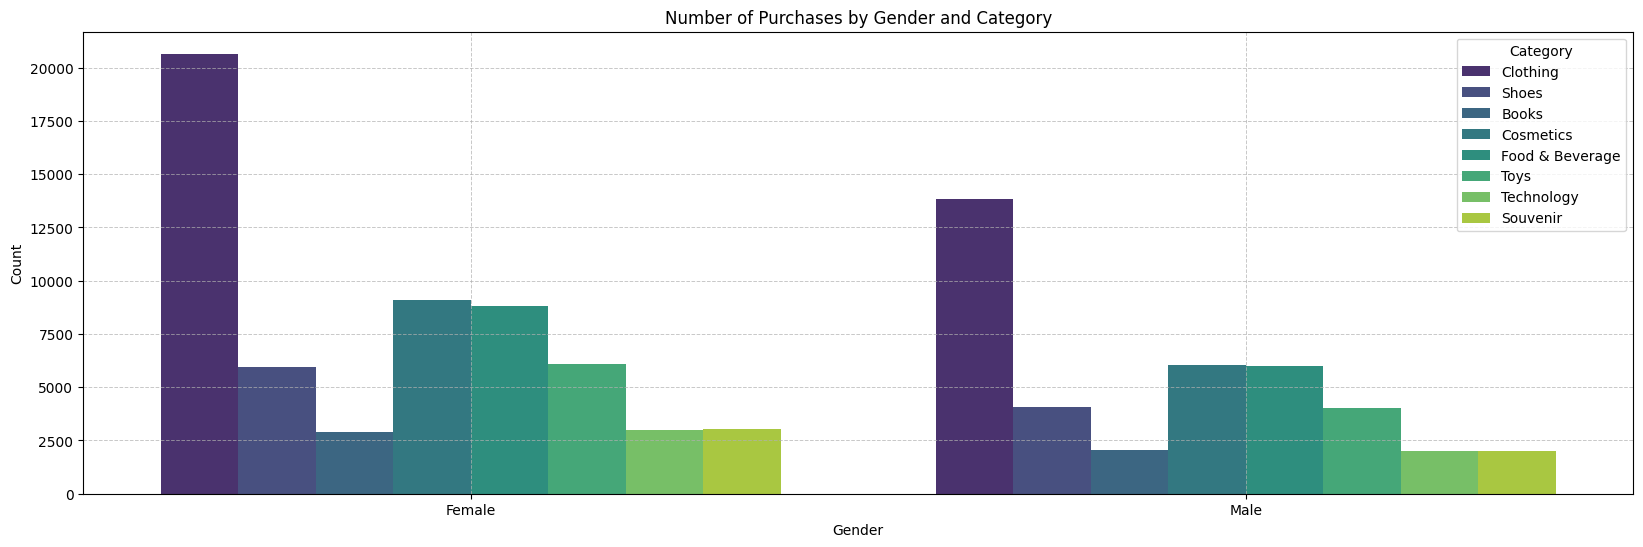

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='Gender', hue='Category', palette='viridis')
plt.title('Number of Purchases by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(title='Category')
plt.show()

#### Female customers:
 Clothing: The most popular category among female customers, with a significantly higher number of purchases compared to male customers.
 Shoes: Also a popular category for female customers, but with a slightly lower number of purchases than clothing.
 Books, cosmetics, food & beverage, toys: These categories have moderate numbers of purchases by female customers.
 Technology, souvenir: These categories have the lowest number of purchases by female customers.
#### Male customers:
 Clothing: The most popular category among male customers, but with a lower number of purchases compared to female customers.
 Shoes: Also a popular category for male customers, with a similar number of purchases as female customers.
Books, cosmetics, food & beverage, toys: These categories have moderate numbers of purchases by male customers.
 Technology, souvenir: These categories have the highest number of purchases by male customers, particularly technology.

## Count and Distribution of Payment Methods by Gender

C:\Users\acer\AppData\Local\Temp\ipykernel_9444\3329569183.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


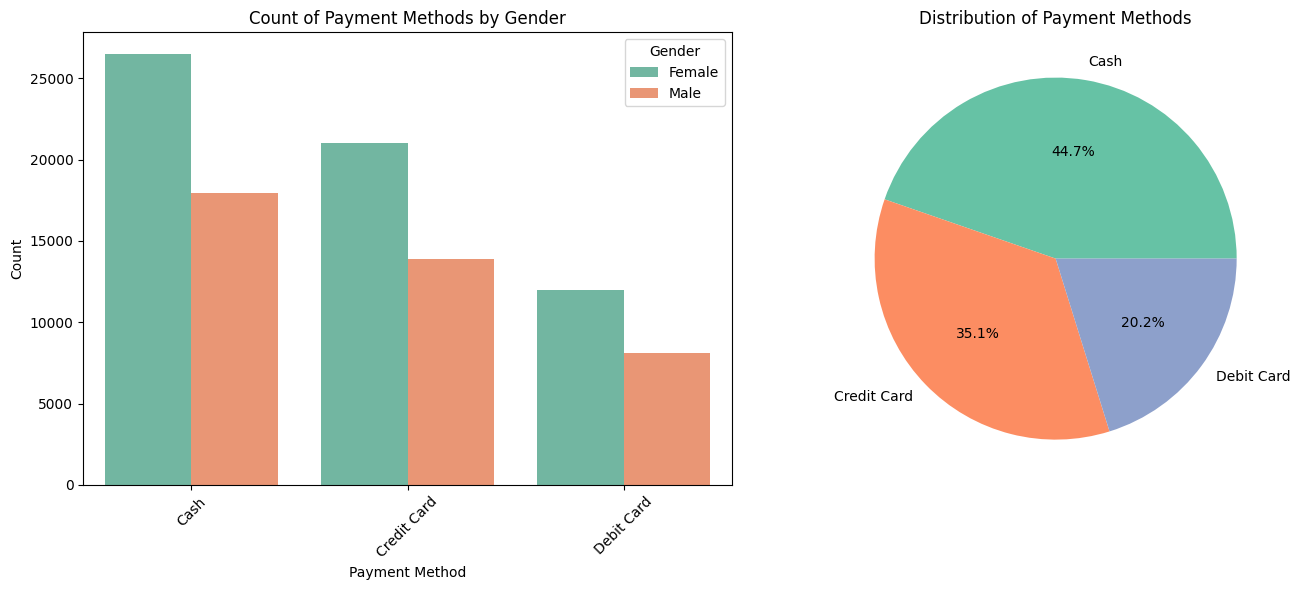

In [16]:
data = pd.DataFrame(data)
data['Gender'] = data['Gender'].astype('category')
data['Payment_method'] = data['Payment_method'].astype('category')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=data, x='Payment_method', hue='Gender', palette='Set2', ax=ax1)
ax1.set_title('Count of Payment Methods by Gender')
ax1.set_xlabel('Payment Method')
ax1.set_ylabel('Count')
ax1.legend(title='Gender')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  
payment_counts = data['Payment_method'].value_counts()
ax2.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=len(payment_counts)))
ax2.set_title('Distribution of Payment Methods')

plt.tight_layout()
plt.show()

#### Female customers:
 Cash: The most popular payment method among female customers, with a count of around 25,000.
 Credit Card: The second most popular payment method, with a count of around 18,000.
 Debit Card: The least popular payment method, with a count of around 11,000.
#### Male customers:
 Cash: The most popular payment method among male customers, with a count of around 22,000.
 Credit Card: The second most popular payment method, with a count of around 14,000.
 Debit Card: The least popular payment method, with a count of around 8,000.
#### Distribution of Payment Methods:

 Cash: The most popular payment method overall, accounting for 44.7% of all transactions.
 Credit Card: The second most popular payment method, accounting for 35.1% of all transactions.
 Debit Card: The least popular payment method, accounting for 20.2% of all transactions.
#### Overall, cash is the most popular payment method among both female and male customers. However, credit cards are also a significant payment method, especially among female customers. Debit cards are the least popular payment method.

## Count and Distribution of Categories by Gender

C:\Users\acer\AppData\Local\Temp\ipykernel_9444\196878547.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


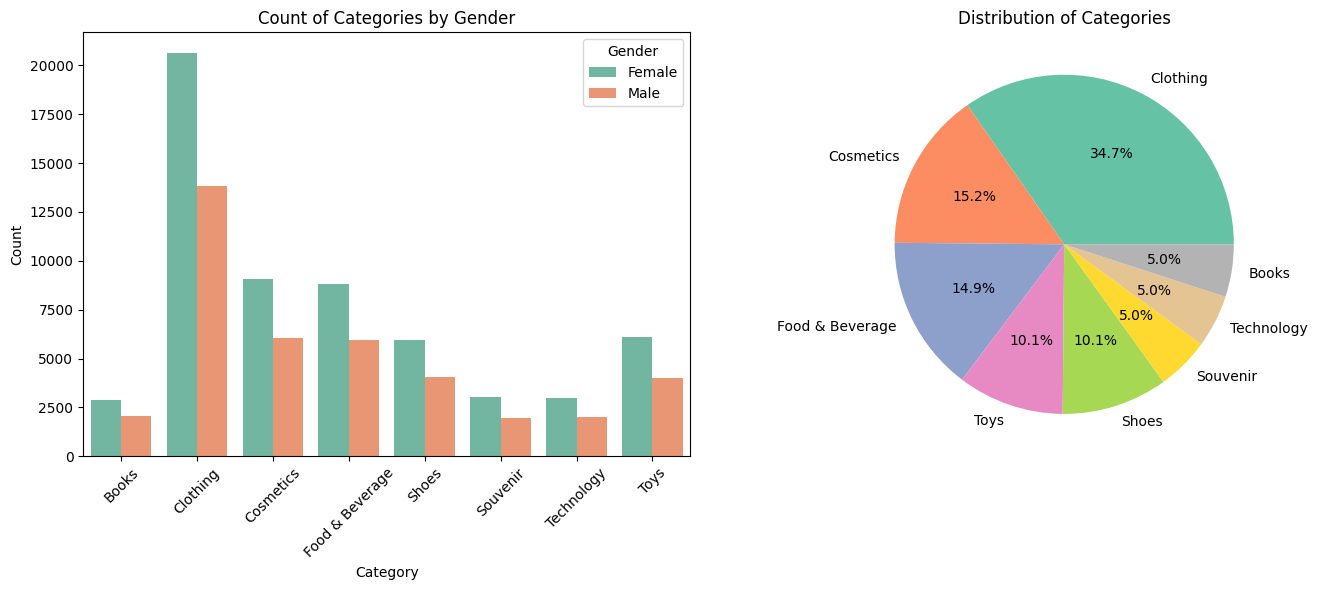

In [17]:

data = pd.DataFrame(data)
data['Gender'] = data['Gender'].astype('category')
data['Category'] = data['Category'].astype('category')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data, x='Category', hue='Gender', palette='Set2', ax=ax1)
ax1.set_title('Count of Categories by Gender')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
ax1.legend(title='Gender')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  

category_counts = data['Category'].value_counts()
ax2.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=len(category_counts)))
ax2.set_title('Distribution of Categories')

plt.tight_layout()
plt.show()

#### Female customers:
 Clothing: The most popular category among female customers, with a significantly higher number of purchases compared to male customers.
 Cosmetics: The second most popular category among female customers, with a slightly lower number of purchases than clothing.
 Books, food & beverage, shoes, souvenir, toys: These categories have moderate numbers of purchases by female customers.
 Technology: The least popular category among female customers.
#### Male customers:
 Clothing: The most popular category among male customers, but with a lower number of purchases compared to female customers.
 Technology: The second most popular category among male customers, with a significantly higher number of purchases compared to female customers.
 Books, cosmetics, food & beverage, shoes, souvenir, toys: These categories have moderate numbers of purchases by male customers.
#### Distribution of Categories:

 Clothing: The most popular category overall, accounting for 34.7% of all purchases.
 Cosmetics: The second most popular category, accounting for 15.2% of all purchases.
 Books, food & beverage, shoes, souvenir, technology, toys: These categories each account for 10.1% of all purchases.

#### Overall, clothing is the most popular category among both female and male customers. However, there are distinct differences in the popularity of other categories between the genders. Female customers tend to purchase more clothing and cosmetics, while male customers are more likely to purchase technology.

## Total Quantity Purchased By Gender Category

In [18]:
df = pd.DataFrame(data)

agg_data = df.groupby(['Gender', 'Category'], as_index=False).agg({'Quantity': 'sum'})

fig = px.line(agg_data, x='Category', y='Quantity', color='Gender', markers=True,
              title='Total Quantity Purchased by Gender and Category',
              line_shape='linear',  
              color_discrete_sequence=px.colors.qualitative.Plotly)  

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Total Quantity',
    legend_title='Gender',
    xaxis=dict(
        tickmode='array',
        tickvals=agg_data['Category'].unique(),
        ticktext=agg_data['Category'].unique(),
        title_font=dict(size=14, family='Arial', color='RebeccaPurple'),
        tickfont=dict(size=12, color='black'),
    ),
    yaxis=dict(
        title='Total Quantity',
        title_font=dict(size=14, family='Arial', color='RebeccaPurple'),
        tickfont=dict(size=12, color='black')
    ),
    title_font=dict(size=18, family='Arial', color='RebeccaPurple'),
    legend=dict(
        title='Gender',
        font=dict(size=12, color='black'),
        bordercolor='Black',
        borderwidth=2
    ),
    margin=dict(l=50, r=50, t=80, b=50)  
)

fig.update_traces(
    marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')),
    line=dict(width=3),
    hoverinfo='text+name+x+y',
    hovertemplate='<b>Category:</b> %{x}<br><b>Quantity:</b> %{y}<br><b>Gender:</b> %{color}<extra></extra>'
)

fig.update_traces(
    mode='lines+markers+text',
    textposition='top center'
)


fig.update_traces(
    hovertemplate='<b>Category:</b> %{x}<br><b>Quantity:</b> %{y}<br><b>Gender:</b> %{color}<extra></extra>'
)
fig.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_9444\2304743013.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(['Gender', 'Category'], as_index=False).agg({'Quantity': 'sum'})


#### Female customers:
Clothing: The most popular category among female customers, with a significantly higher number of purchases compared to male customers.
 Cosmetics: The second most popular category among female customers, with a slightly lower number of purchases than clothing.
 Books, food & beverage, shoes, souvenir, toys: These categories have moderate numbers of purchases by female customers.
 Technology: The least popular category among female customers.
#### Male customers:
 Clothing: The most popular category among male customers, but with a lower number of purchases compared to female customers.
Technology: The second most popular category among male customers, with a significantly higher number of purchases compared to female customers.
 Books, cosmetics, food & beverage, shoes, souvenir, toys: These categories have moderate numbers of purchases by male customers.
#### Distribution of Categories:

 Clothing: The most popular category overall, accounting for 34.7% of all purchases.
 Cosmetics: The second most popular category, accounting for 15.2% of all purchases.
 Books, food & beverage, shoes, souvenir, technology, toys: These categories each account for 10.1% of all purchases.
#### Overall, clothing is the most popular category among both female and male customers. However, there are distinct differences in the popularity of other categories between the genders. Female customers tend to purchase more clothing and cosmetics, while male customers are more likely to purchase technology.

## CONCLUSION


### 

1. **Gender Distribution and Spending Patterns:**
   - **Female Customers:** Represent 59.8% of the dataset, making them the majority. They exhibit a higher total spending in the age group 21-40 (38.8%) and 41-60 (38.4%). However, their spending in the age groups 0-20 and 80+ is relatively low (3.7% and 0.8%, respectively).
   - **Male Customers:** Account for 40.2% of the dataset. Their spending is significant in the age groups 21-40 and 41-60, though slightly less compared to females in the same age ranges.

2. **Category Preferences:**
   - **Female Customers:** Prefer clothing (the most popular category), followed by cosmetics. Categories such as books, food & beverage, shoes, and toys see moderate purchase frequencies, while technology and souvenirs are the least popular.
   - **Male Customers:** Also favor clothing, but with a lower purchase frequency compared to females. Technology is a notably popular category among males, surpassing female interest, while other categories see similar purchase patterns to those of female customers.

3. **Payment Methods:**
   - **Female Customers:** Primarily use cash as their payment method, followed by credit cards and debit cards.
   - **Male Customers:** Also prefer cash, with credit cards and debit cards following in popularity. Cash is the overall most favored payment method among all customers, but credit cards hold significant usage, especially among females.

4. **Overall Spending Insights:**
   - **Age Groups:** Spending is highest among the 21-40 and 41-60 age groups for both genders, with lower contributions from the youngest and oldest age brackets.
   - **Categories:** Clothing is the most popular overall category, with cosmetics following. Technology stands out as a prominent category for males, indicating a gender-specific preference.
   - **Payment Methods:** Cash dominates as the preferred payment method across both genders, though credit cards are notably popular among female customers.

In summary, while clothing remains the most popular category for both genders, significant gender-specific preferences emerge. Females spend more on clothing and cosmetics, while males show a stronger inclination towards technology. Cash is the universally preferred payment method, reflecting broader payment habits among customers. The data underscores notable trends in spending behavior and category preferences that vary by gender and age group.

# THANK YOU